## Diffusion of a bell-shaped initial concentration along an persistent gradient
Similar to the experiment *diffusion_along_gradient_1*, but now the gradient is NOT an initial condition; rather, it's a persistent dynamic condition (explored in experiment *gradient_1*).

The one-chemical system starts out with a uniform concentration. 
The persistent concentration gradient is attained by continuosly injecting and draining, at opposite ends.

After a stable gradient is established, a one-time injection is performed, to
add a bell-shape concentration near one end of the system, on the "uphill" side of the gradient.

Just as seen in the case of *diffusion_along_gradient_1*, the concentration peak
remains in place, and simply spreads out from there

LAST REVISED: Oct. 12, 2022

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(3)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from life_1D.bio_sim_1d import BioSim1D

import plotly.express as px
from modules.chemicals.chemicals import Chemicals as chem

In [3]:
# Initialize the system with a uniform concentration (of the only species)
chem_data = chem(names=["A"], diffusion_rates=[3.])
bio = BioSim1D(n_bins=200, chem_data=chem_data)

bio.set_uniform_concentration(species_index=0, conc=150.)

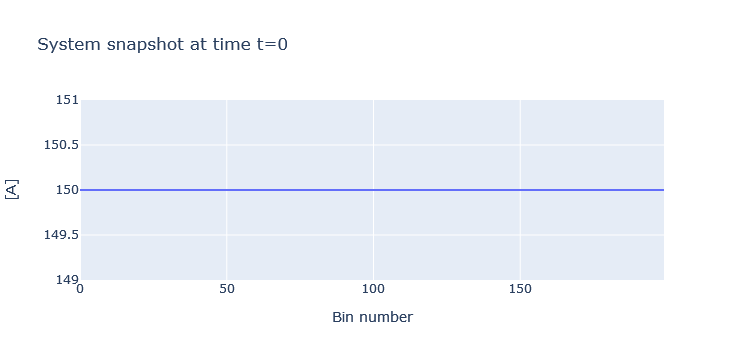

In [4]:
# Visualize the system state so far
bio.visualize_system()

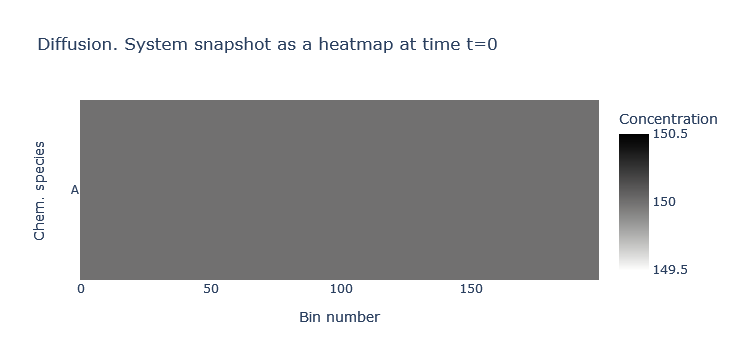

In [5]:
# Show as heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= f"Diffusion. System snapshot as a heatmap at time t={bio.system_time}", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                color_continuous_scale="gray_r")

fig.data[0].xgap=0
fig.data[0].ygap=0

fig.show()

# Start the simulation steps

In [6]:
delta_time = 1.

Repeatedly injecting 2 at bin 0 and draining it at 199


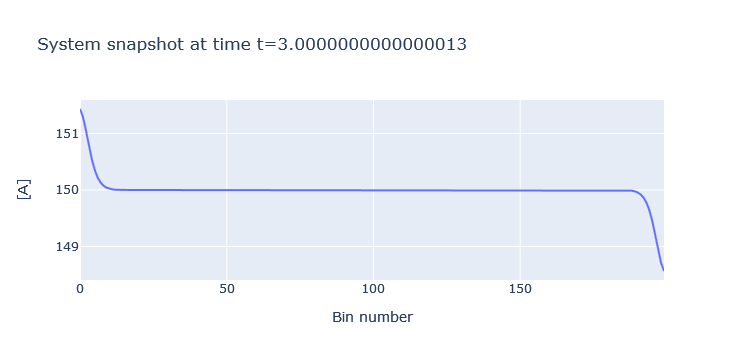

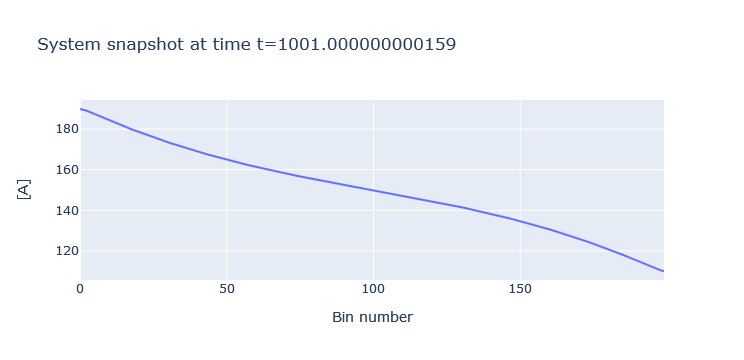

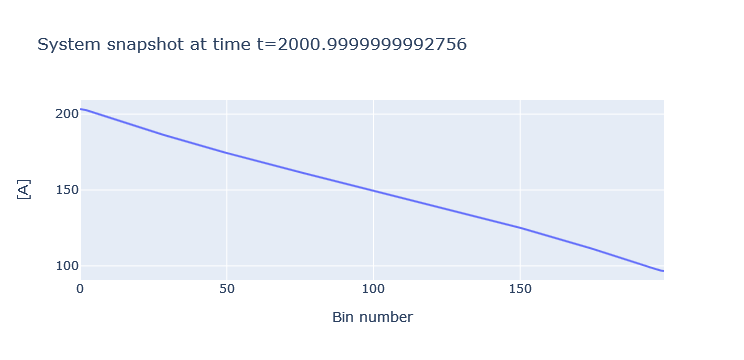

In [7]:
leftmost_bin = 0
rightmost_bin = bio.system_size() - 1
delta_injection = 2

print(f"Repeatedly injecting {delta_injection} at bin {leftmost_bin} and draining it at {rightmost_bin}")

for i in range(2001):
    # Inject to the leftmost bin
    bio.inject_conc_to_bin(bin_address=leftmost_bin, species_index=0, delta_conc=delta_injection, zero_clip = False)
    
    # Drain from the rightmost bin
    bio.inject_conc_to_bin(bin_address=rightmost_bin, species_index=0, delta_conc=-delta_injection, zero_clip = False)
    
    # Note: the NET GAIN of moles of A in the system is zero!
    
    # Diffuse for the time span delta_time
    status = bio.diffuse(total_duration=delta_time, time_step=0.1)

    
    if (i == 2) or (i == 1000) or (i == 2000):   # Display the early, middle and final state     
        bio.visualize_system()

In [8]:
(bio.bin_concentration(bin_address=0, species_name="A") ,
 bio.bin_concentration(bin_address=rightmost_bin, species_name="A"))

(203.33945718438923, 96.66054281561514)

### By now, the gradient has stabilized with  
### [A] = 203.34 on the left and [A] = 96.66 on the right
Their average is 150, equal to the initial uniform concentration, since the net injection/drain is balanced

Note: if the drain is too large, relative to the diffusion rate, the smaller concentration could "saturate" at zero

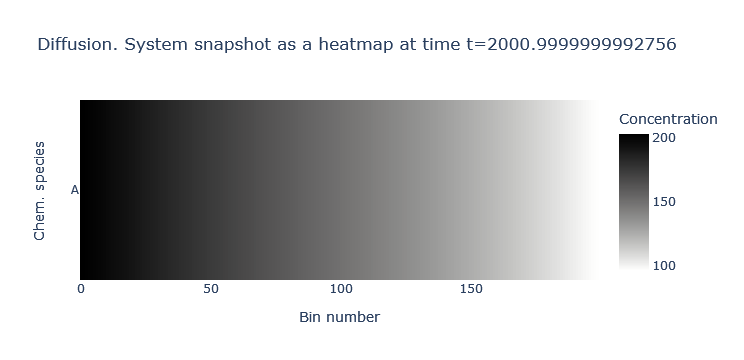

In [9]:
# Show as heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= f"Diffusion. System snapshot as a heatmap at time t={bio.system_time}", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                color_continuous_scale="gray_r")

fig.data[0].xgap=0
fig.data[0].ygap=0

fig.show()

In [10]:
# Now that the system is at a steady statem, 
# inject a bell-shape concentration, with the peak close to one end of the system
bio.inject_bell_curve(species_name="A", mean=0.25, sd=0.1, amplitude=30., bias=0)

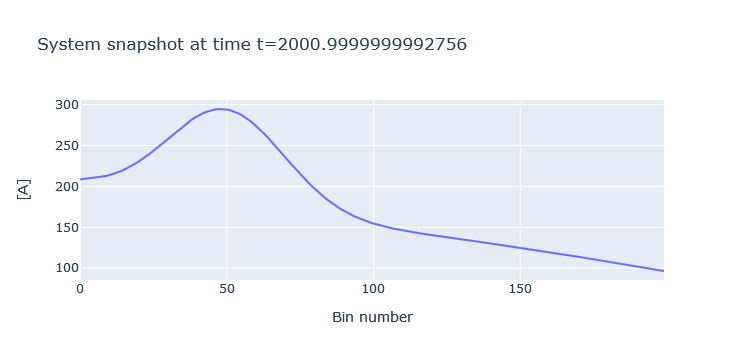

In [11]:
# Visualize the system state at this stage
bio.visualize_system()

Resuming repeatedly injecting 2 at bin 0 and draining it at 199


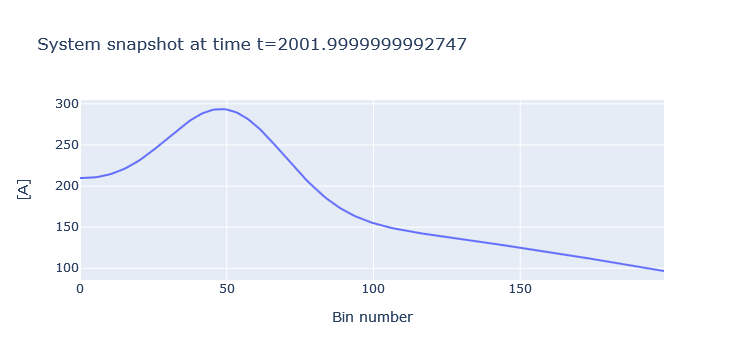

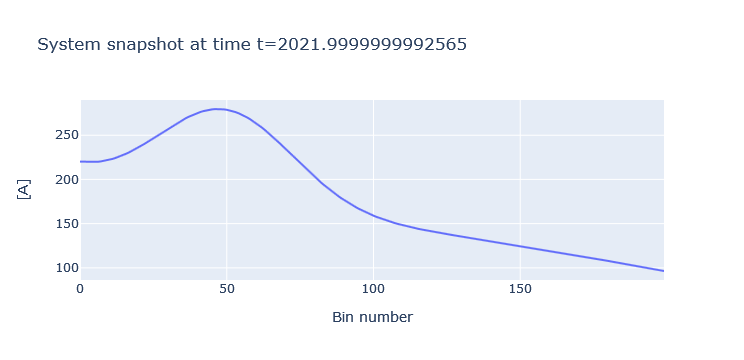

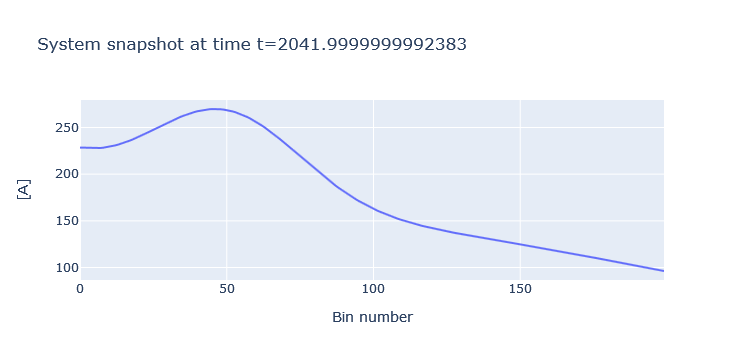

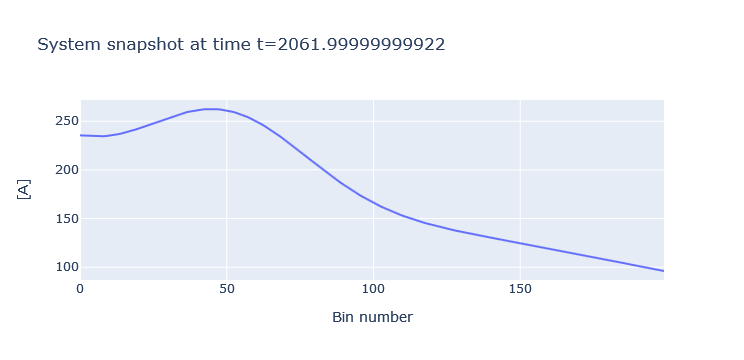

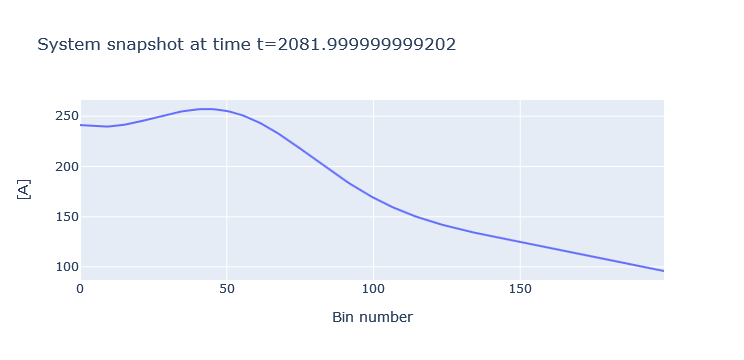

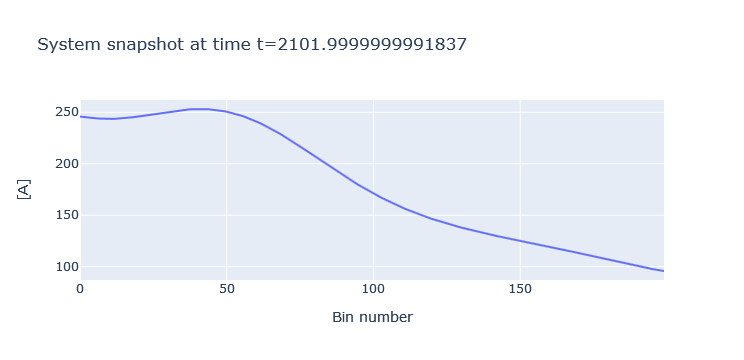

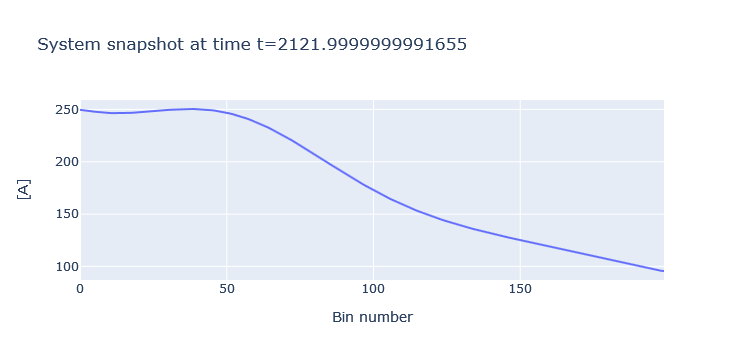

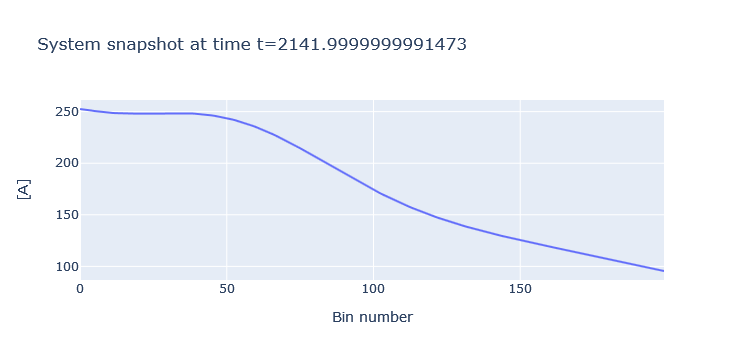

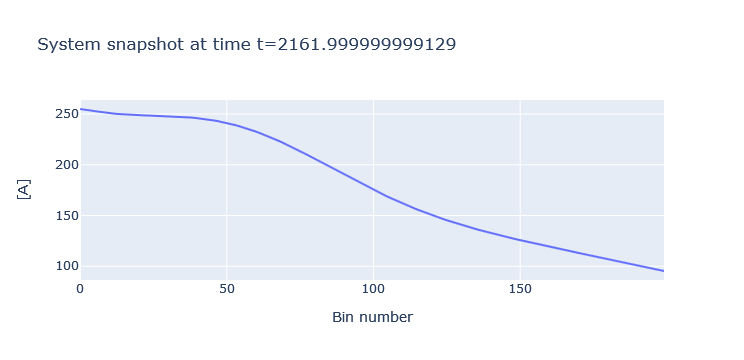

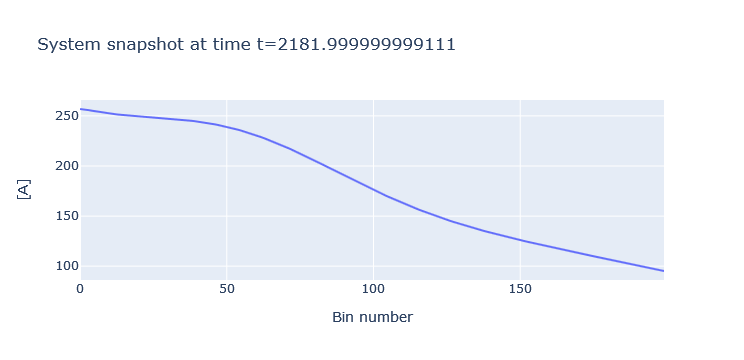

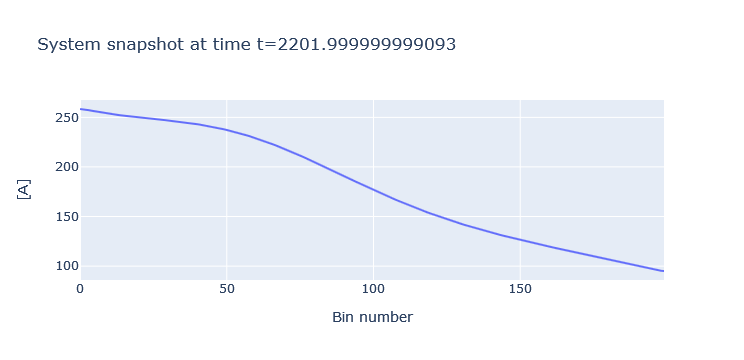

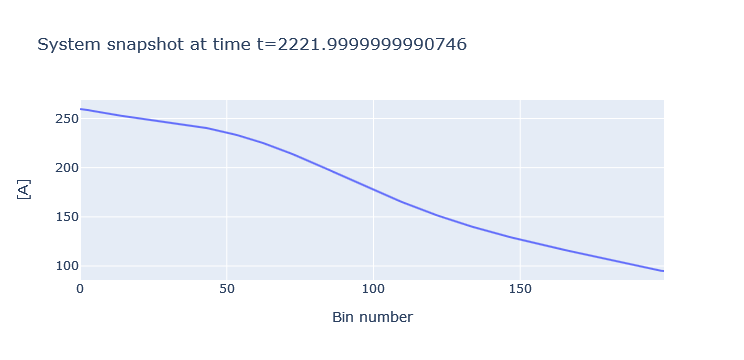

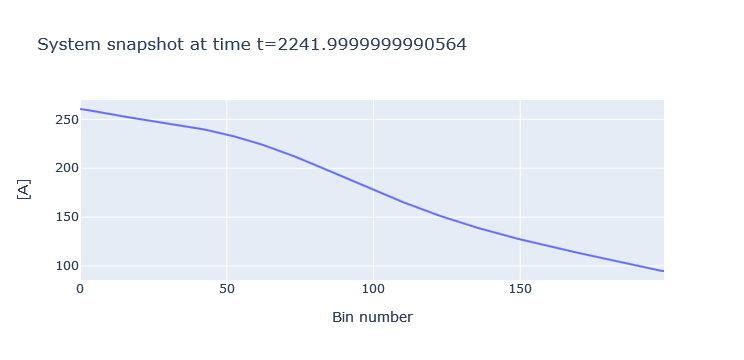

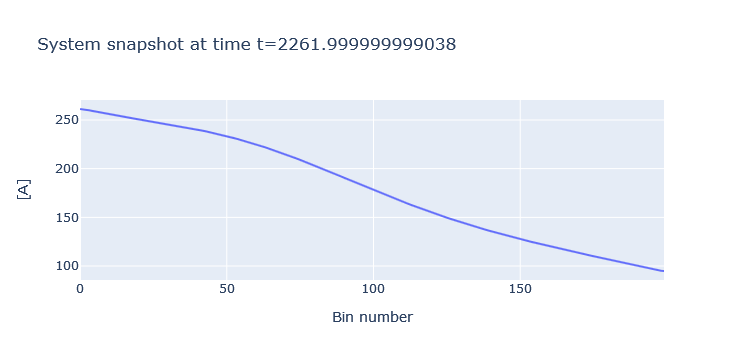

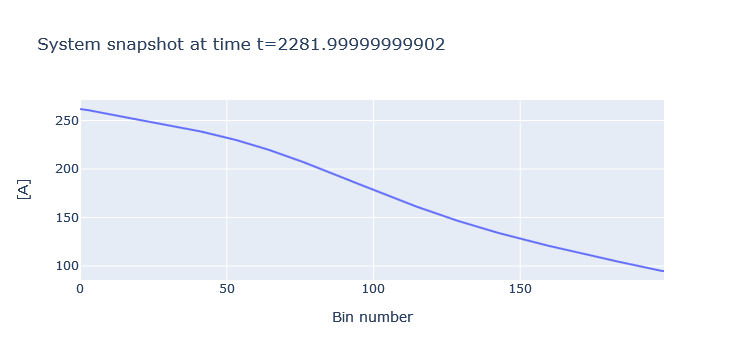

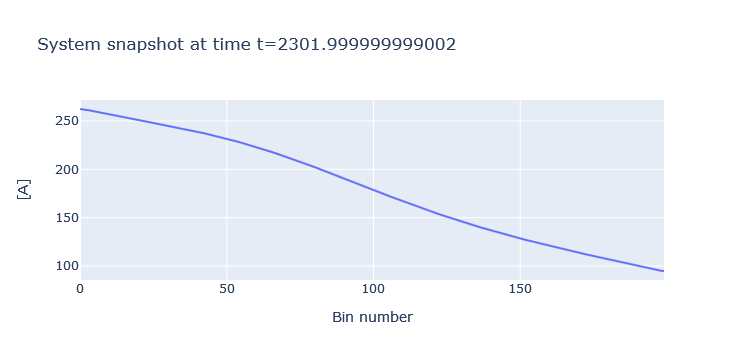

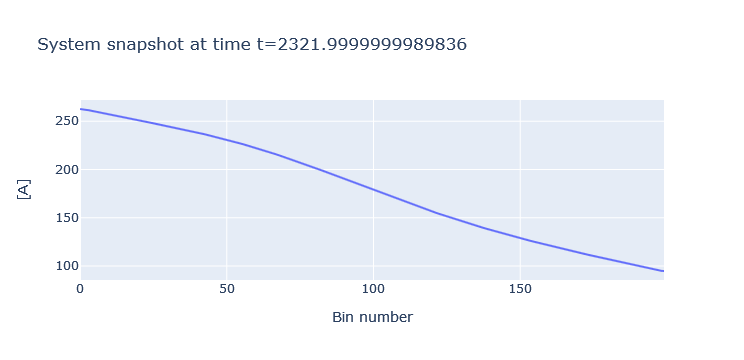

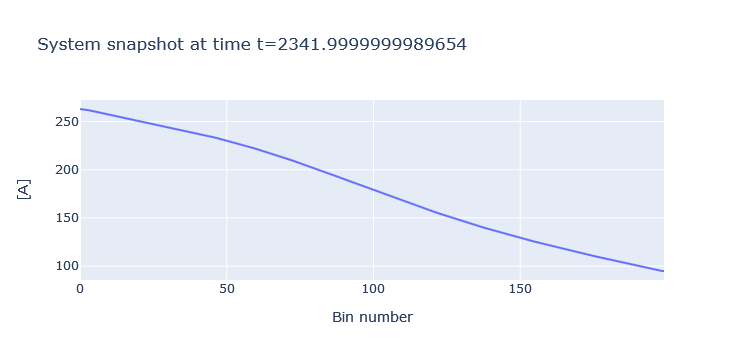

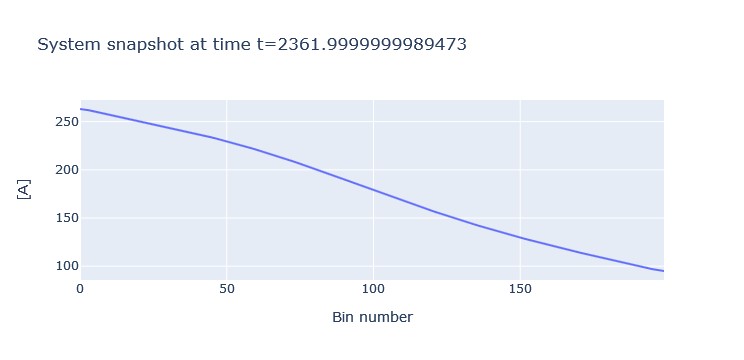

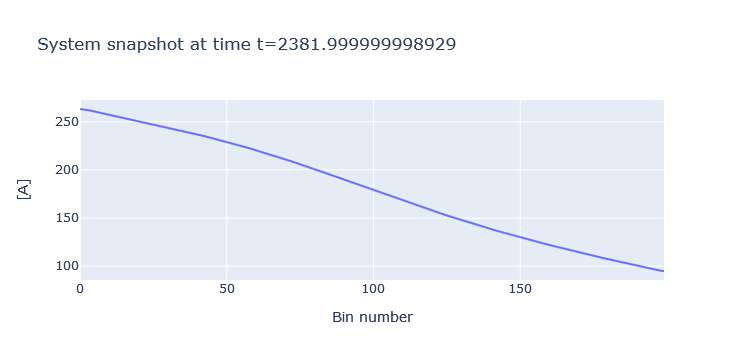

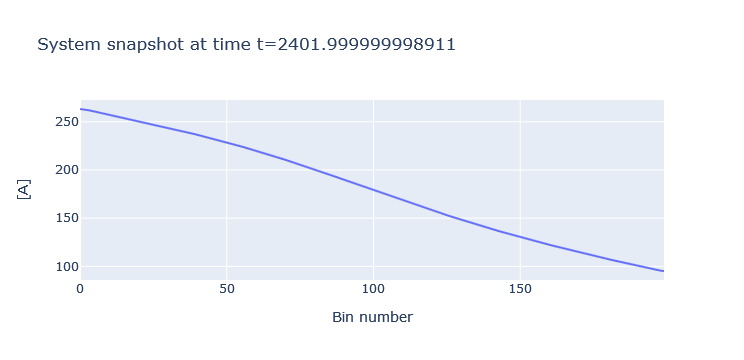

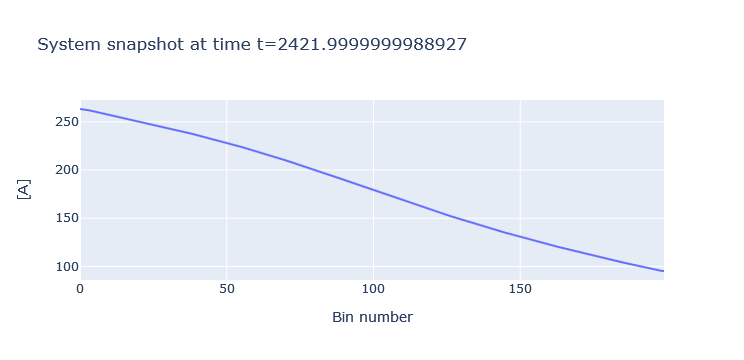

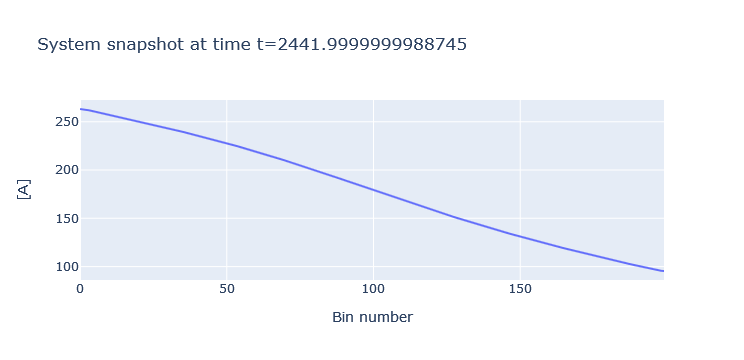

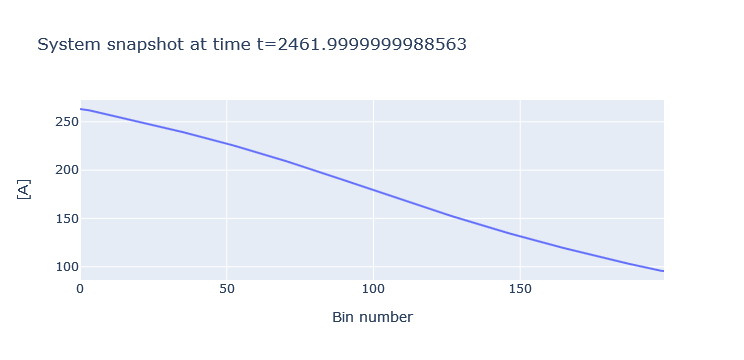

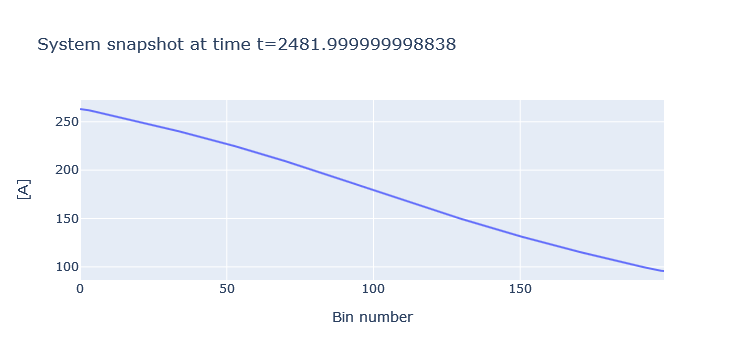

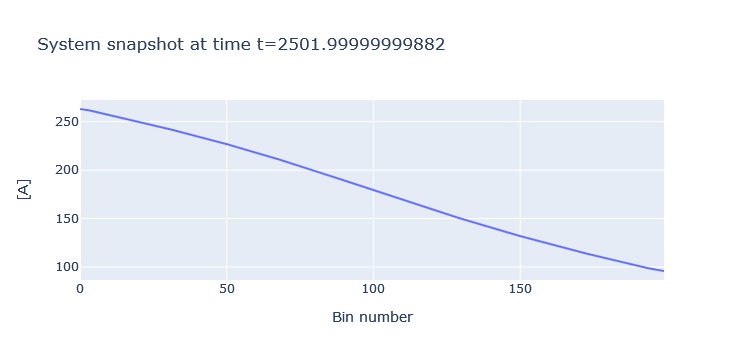

In [12]:
print(f"Resuming repeatedly injecting {delta_injection} at bin {leftmost_bin} and draining it at {rightmost_bin}")

for i in range(501):
    # Inject to the leftmost bin
    bio.inject_conc_to_bin(bin_address=leftmost_bin, species_index=0, delta_conc=delta_injection, zero_clip = False)
    
    # Drain from the rightmost bin
    bio.inject_conc_to_bin(bin_address=rightmost_bin, species_index=0, delta_conc=-delta_injection, zero_clip = False)
    
    # Note: the NET GAIN of moles of A in the system is zero!
    
    # Diffuse for the time span delta_time
    status = bio.diffuse(total_duration=delta_time, time_step=0.1)

    
    if (i%20 == 0):        # Display every so often     
        bio.visualize_system()

In [13]:
(bio.bin_concentration(bin_address=0, species_name="A") ,
 bio.bin_concentration(bin_address=rightmost_bin, species_name="A"))

(262.99621803202314, 95.88704136179823)

### The one-time pulse injected into the system, gradually "melted into" the gradient.
The gradient finally re-stabilizes with   
[A] = 263 on the left and [A] = 95.89 on the right.   
Their average is about 179.4, which is equal to the initial uniform concentration of 150, plus most of the bell curve, which had amplitude=30. (i.e. total area under it of 30, minus a little that was clipped to the left.)